<a href="https://colab.research.google.com/github/teahibiscus/general-project-fall25/blob/main/Train_your_first_CNN_here!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TODO: Import libraries required here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Using MNIST dataset: 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (CNN expects 3D inputs)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
# Each image is 28×28 pixels, grayscale (1 channel).
# Normalization helps the model learn faster.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


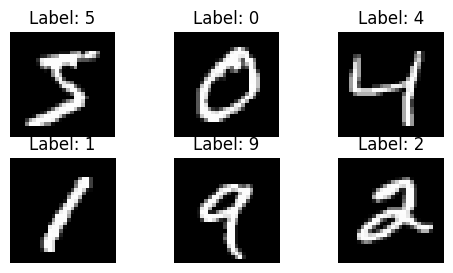

In [3]:
# Show images
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# What do you notice about how similar some digits look?
# Things to think about: What do you notice about how similar some digits look?

In [4]:
#Building a simple CNN

model = models.Sequential([
    # TODO: Add first Conv2D layer (32 filters, 3x3 kernel, 'relu', input_shape=(28,28,1))
    # layers.Conv2D(...),

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    # TODO: Add MaxPooling layer (2x2)
    layers.MaxPooling2D(2, 2),

    # TODO: Add second Conv2D layer (64 filters, 3x3, 'relu')
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),

    # TODO: Add second MaxPooling layer
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    # TODO: Add Dense layer with 64 units, 'relu' activation
    layers.Dense(64, activation='relu'),

    # TODO: Add final Dense layer with 10 units, 'softmax' activation
    layers.Dense(10, activation='softmax')
])

model.summary()

# Exercise:
# Why do early layers detect edges and later layers detect shapes? Discuss.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the Model

# TODO: Compile the model using:
# optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,          # Can increase for better performance
                    batch_size=64,
                    validation_split=0.1, # 10% data for validation
                    verbose=2)

Epoch 1/10
844/844 - 9s - 11ms/step - accuracy: 0.9431 - loss: 0.1903 - val_accuracy: 0.9827 - val_loss: 0.0612
Epoch 2/10
844/844 - 3s - 3ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 3/10
844/844 - 3s - 4ms/step - accuracy: 0.9871 - loss: 0.0401 - val_accuracy: 0.9865 - val_loss: 0.0453
Epoch 4/10
844/844 - 3s - 3ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9890 - val_loss: 0.0417
Epoch 5/10
844/844 - 3s - 3ms/step - accuracy: 0.9919 - loss: 0.0242 - val_accuracy: 0.9885 - val_loss: 0.0381
Epoch 6/10
844/844 - 3s - 3ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 7/10
844/844 - 3s - 3ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9890 - val_loss: 0.0407
Epoch 8/10
844/844 - 3s - 3ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9898 - val_loss: 0.0446
Epoch 9/10
844/844 - 3s - 3ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9907 - val_loss: 0.0402


In [6]:
# Evaluate the Model

# TODO: Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"\nTest accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9846 - loss: 0.0581

Test accuracy: 0.989


In [7]:
# Make Predictions

# TODO: Predict the first 9 test images
predictions = model.predict(x_test[:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


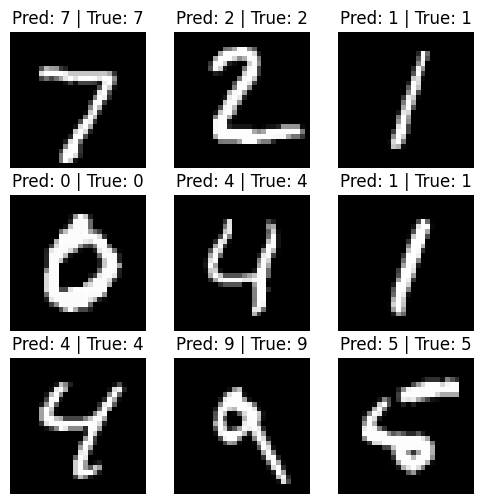

In [8]:
import numpy as np

# Get predictions for all test samples (outside the plotting loop)
preds = model.predict(x_test)              # preds.shape: (num_samples, num_classes)
pred_classes = np.argmax(preds, axis=1)    # Class with highest probability

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]} | True: {y_test[i]}")
    plt.axis('off')
plt.show()
